In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
from dateutil.parser import parse


file_path = "export.xml"
tree = ET.parse(file_path)
root = tree.getroot()

# Extract the 'Record' elements (specific to Apple Health data structure)
sleep_data_24 = []
for record in root.findall(".//Record"):
    if record.attrib.get('type') == 'HKCategoryTypeIdentifierSleepAnalysis':
        start_date = record.attrib.get('startDate')  # Get the startDate attribute
        end_date = record.attrib.get('endDate')      # Get the endDate attribute
        value = record.attrib.get('value')          # Sleep analysis value (e.g., in-bed, asleep, etc.)

        # Filter for the year 2024
        if start_date and parse(start_date).year == 2024:
            sleep_data_24.append({
                'Start Date': start_date,
                'End Date': end_date,
                'Sleep Value': value
            })

# Convert to a DataFrame for easier manipulation and visualization
df = pd.DataFrame(sleep_data_24)

# Convert 'Start Date' and 'End Date' columns to datetime format
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])

# Calculate sleep duration in hours
df['Sleep Duration (hours)'] = (df['End Date'] - df['Start Date']).dt.total_seconds() / 3600

# Group by day and sum sleep durations
daily_sleep_24 = df.groupby(df['Start Date'].dt.date)['Sleep Duration (hours)'].sum().reset_index()
daily_sleep_24.rename(columns={'Start Date': 'Day'}, inplace=True)

# Display the DataFrame in Colab
print(daily_sleep_24)


            Day  Sleep Duration (hours)
0    2024-01-01                5.399722
1    2024-01-02                4.309444
2    2024-01-03                6.211667
3    2024-01-04                5.900000
4    2024-01-05                5.588056
..          ...                     ...
182  2024-09-11                7.083333
183  2024-09-12                7.083889
184  2024-09-13                6.367500
185  2024-09-16                7.083333
186  2024-09-17                6.756667

[187 rows x 2 columns]


In [2]:
df = pd.DataFrame(sleep_data_24)


df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])


df['Sleep Duration (hours)'] = (df['End Date'] - df['Start Date']).dt.total_seconds() / 3600


daily_sleep_24 = df.groupby(df['Start Date'].dt.date)['Sleep Duration (hours)'].sum().reset_index()
daily_sleep_24.rename(columns={'Start Date': 'Day'}, inplace=True)


print(daily_sleep_24)

            Day  Sleep Duration (hours)
0    2024-01-01                5.399722
1    2024-01-02                4.309444
2    2024-01-03                6.211667
3    2024-01-04                5.900000
4    2024-01-05                5.588056
..          ...                     ...
182  2024-09-11                7.083333
183  2024-09-12                7.083889
184  2024-09-13                6.367500
185  2024-09-16                7.083333
186  2024-09-17                6.756667

[187 rows x 2 columns]


i realized the data for 2024 is not collected fully so i did it for also 2023

In [9]:

file_path = "export.xml"
tree = ET.parse(file_path)
root = tree.getroot()


sleep_data_23 = []
for record in root.findall(".//Record"):
    if record.attrib.get('type') == 'HKCategoryTypeIdentifierSleepAnalysis':
        start_date = record.attrib.get('startDate')
        end_date = record.attrib.get('endDate')
        value = record.attrib.get('value')

        # Filter for the year 2023
        if start_date and parse(start_date).year == 2023:
            sleep_data_23.append({
                'Start Date': start_date,
                'End Date': end_date,
                'Sleep Value': value
            })


df = pd.DataFrame(sleep_data_23)

df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])


df['Sleep Duration (hours)'] = (df['End Date'] - df['Start Date']).dt.total_seconds() / 3600


daily_sleep_23 = df.groupby(df['Start Date'].dt.date)['Sleep Duration (hours)'].sum().reset_index()
daily_sleep_23.rename(columns={'Start Date': 'Day'}, inplace=True)

print(daily_sleep_23)


            Day  Sleep Duration (hours)
0    2023-01-02                6.117778
1    2023-01-03                6.977222
2    2023-01-04                6.146111
3    2023-01-05                5.958056
4    2023-01-06                5.853611
..          ...                     ...
254  2023-12-25                5.391667
255  2023-12-26                6.630833
256  2023-12-27                6.228056
257  2023-12-28                5.754167
258  2023-12-29                5.787222

[259 rows x 2 columns]


In [10]:

merged_sleep_data = pd.concat([daily_sleep_23, daily_sleep_24], ignore_index=True)


merged_sleep_data.sort_values(by='Day', inplace=True)


merged_sleep_data.reset_index(drop=True, inplace=True)

print(merged_sleep_data)


            Day  Sleep Duration (hours)
0    2023-01-02                6.117778
1    2023-01-03                6.977222
2    2023-01-04                6.146111
3    2023-01-05                5.958056
4    2023-01-06                5.853611
..          ...                     ...
441  2024-09-11                7.083333
442  2024-09-12                7.083889
443  2024-09-13                6.367500
444  2024-09-16                7.083333
445  2024-09-17                6.756667

[446 rows x 2 columns]


In [11]:
data_sleep = merged_sleep_data

In [12]:
print(data_sleep)

            Day  Sleep Duration (hours)
0    2023-01-02                6.117778
1    2023-01-03                6.977222
2    2023-01-04                6.146111
3    2023-01-05                5.958056
4    2023-01-06                5.853611
..          ...                     ...
441  2024-09-11                7.083333
442  2024-09-12                7.083889
443  2024-09-13                6.367500
444  2024-09-16                7.083333
445  2024-09-17                6.756667

[446 rows x 2 columns]


i realized some missing values i fill them with average

<ipython-input-13-06bf3e1dc3b8>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_sleep_data['Sleep Duration (hours)'].fillna(average_sleep_duration, inplace=True)


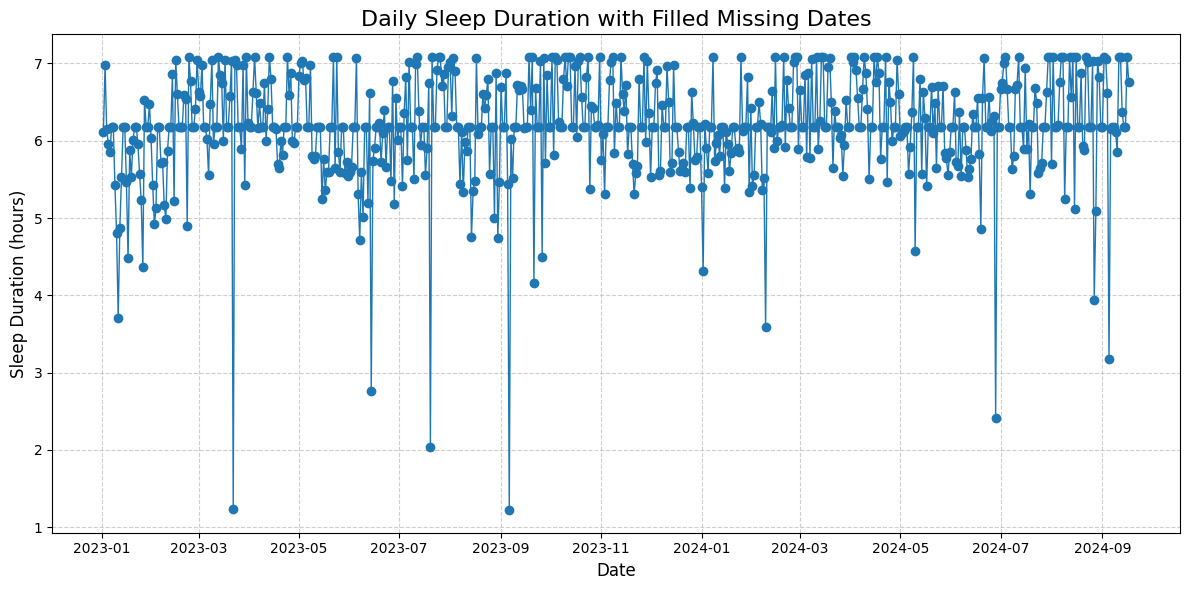

In [13]:
import matplotlib.pyplot as plt

merged_sleep_data['Day'] = pd.to_datetime(merged_sleep_data['Day'])


date_range = pd.date_range(start=merged_sleep_data['Day'].min(), end=merged_sleep_data['Day'].max())

merged_sleep_data = merged_sleep_data.set_index('Day').reindex(date_range)

merged_sleep_data.index.name = 'Day'

average_sleep_duration = merged_sleep_data['Sleep Duration (hours)'].mean()
merged_sleep_data['Sleep Duration (hours)'].fillna(average_sleep_duration, inplace=True)

merged_sleep_data.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(merged_sleep_data['Day'], merged_sleep_data['Sleep Duration (hours)'], marker='o', linestyle='-', linewidth=1)
plt.title('Daily Sleep Duration with Filled Missing Dates', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sleep Duration (hours)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


My sleep data is ready

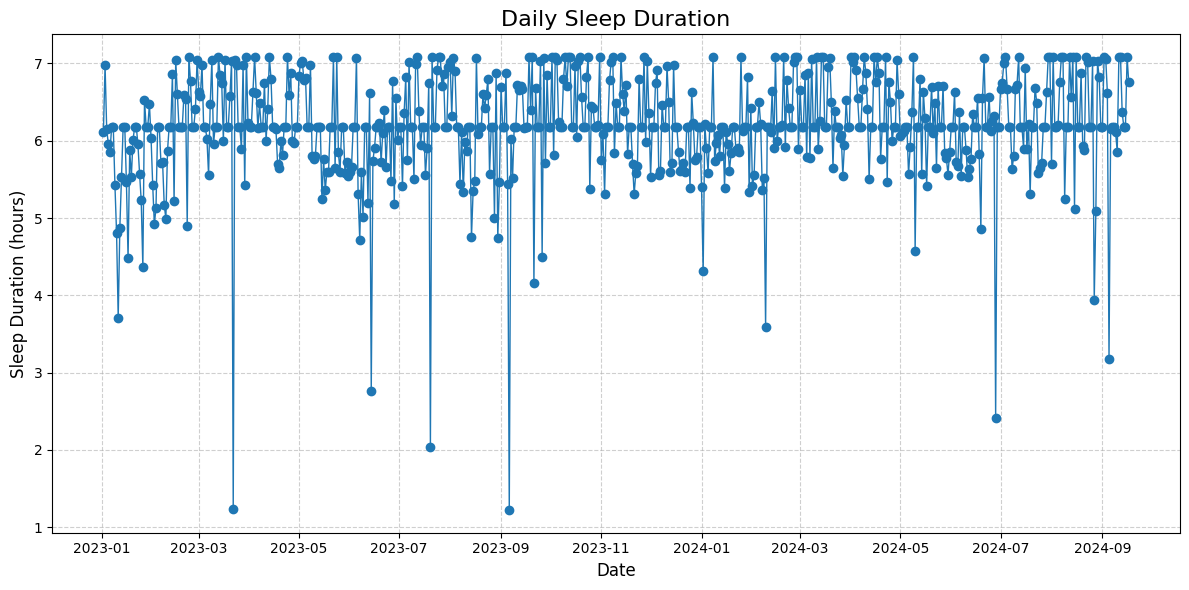

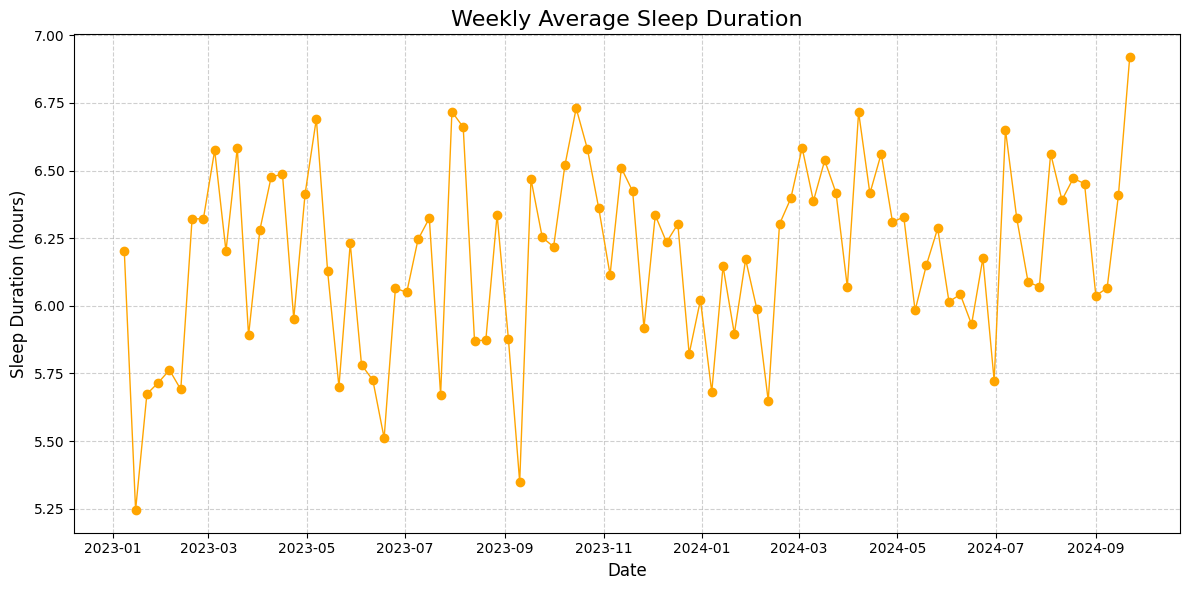

<ipython-input-14-70cfa5020e9d>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sleep = merged_sleep_data['Sleep Duration (hours)'].resample('M').mean()


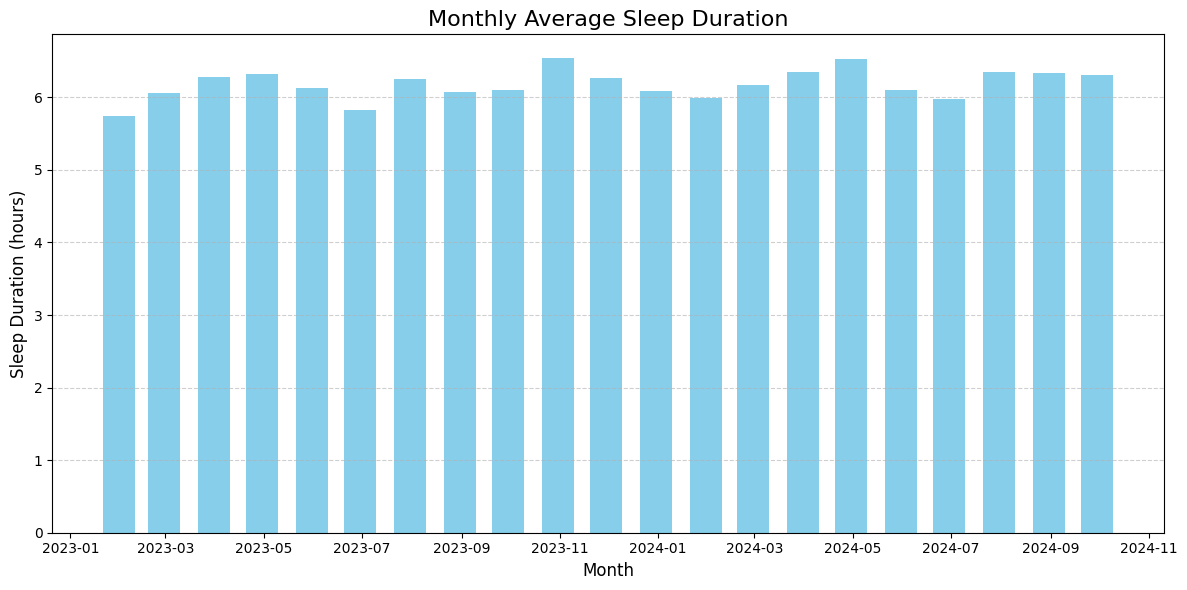

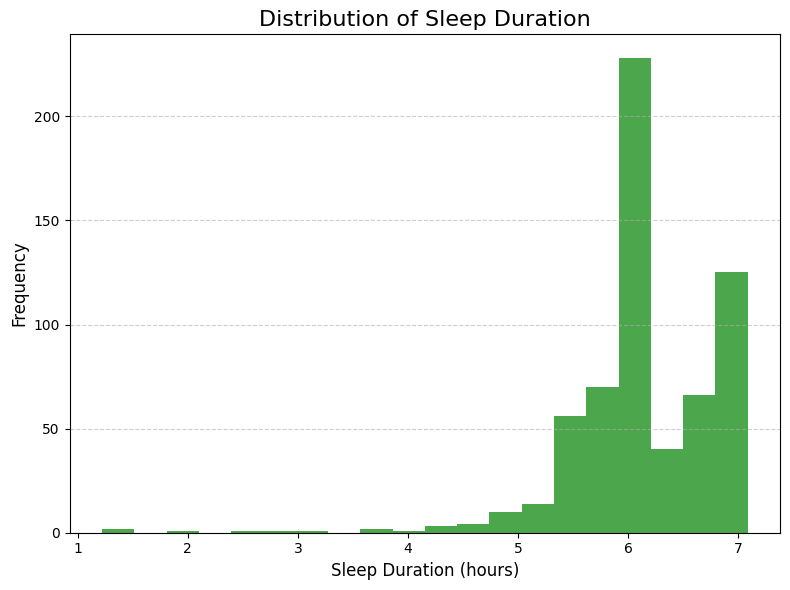

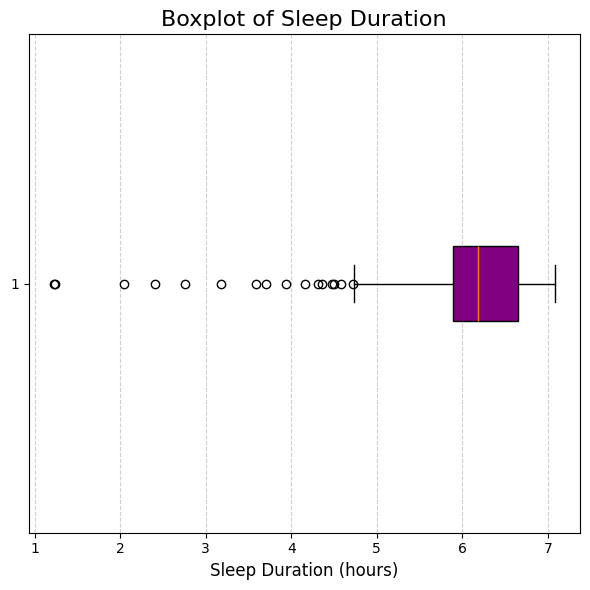

In [14]:
# Convert 'Day' to datetime for proper resampling
merged_sleep_data['Day'] = pd.to_datetime(merged_sleep_data['Day'])
merged_sleep_data.set_index('Day', inplace=True)

# Daily sleep duration
plt.figure(figsize=(12, 6))
plt.plot(merged_sleep_data.index, merged_sleep_data['Sleep Duration (hours)'], marker='o', linestyle='-', linewidth=1)
plt.title('Daily Sleep Duration', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sleep Duration (hours)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Weekly average sleep duration
weekly_sleep = merged_sleep_data['Sleep Duration (hours)'].resample('W').mean()
plt.figure(figsize=(12, 6))
plt.plot(weekly_sleep.index, weekly_sleep, marker='o', linestyle='-', linewidth=1, color='orange')
plt.title('Weekly Average Sleep Duration', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sleep Duration (hours)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Monthly average sleep duration
monthly_sleep = merged_sleep_data['Sleep Duration (hours)'].resample('M').mean()
plt.figure(figsize=(12, 6))
plt.bar(monthly_sleep.index, monthly_sleep, color='skyblue', width=20)
plt.title('Monthly Average Sleep Duration', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sleep Duration (hours)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Sleep duration distribution
plt.figure(figsize=(8, 6))
plt.hist(merged_sleep_data['Sleep Duration (hours)'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Sleep Duration', fontsize=16)
plt.xlabel('Sleep Duration (hours)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Boxplot for overall sleep duration
plt.figure(figsize=(6, 6))
plt.boxplot(merged_sleep_data['Sleep Duration (hours)'], vert=False, patch_artist=True, boxprops=dict(facecolor='purple', color='black'))
plt.title('Boxplot of Sleep Duration', fontsize=16)
plt.xlabel('Sleep Duration (hours)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [15]:
import json
import pandas as pd
from google.colab import files

file_name = "Streaming_History_Audio_2022-2024_3.json"


data = []

with open(file_name, 'r') as file:
    json_data = json.load(file)
    data.extend(json_data)


spotify_data = pd.DataFrame(data)



In [16]:
print(spotify_data)

                         ts                 platform  ms_played conn_country  \
0      2022-06-15T17:33:13Z  iOS 13.3.1 (iPhone11,8)       3477           TR   
1      2022-06-15T17:37:27Z  iOS 13.3.1 (iPhone11,8)     255346           TR   
2      2022-06-15T17:57:15Z  iOS 13.3.1 (iPhone11,8)     280277           TR   
3      2022-06-15T17:59:58Z  iOS 13.3.1 (iPhone11,8)     164000           TR   
4      2022-06-15T18:55:32Z  iOS 13.3.1 (iPhone11,8)     211478           TR   
...                     ...                      ...        ...          ...   
15979  2024-12-26T19:02:55Z                      ios     131368           TR   
15980  2024-12-26T19:13:44Z                      ios     258342           TR   
15981  2024-12-26T19:16:36Z                      ios     159822           TR   
15982  2024-12-26T19:18:08Z                      ios      90573           TR   
15983  2024-12-26T19:20:10Z                      ios     111141           TR   

             ip_addr        master_meta

i get only relevant columns

In [18]:
spotify_data = spotify_data[['ts', 'ms_played', 'master_metadata_album_artist_name', 'master_metadata_track_name', 'spotify_track_uri']]

print(spotify_data)


                         ts  ms_played master_metadata_album_artist_name  \
0      2022-06-15T17:33:13Z       3477                             Model   
1      2022-06-15T17:37:27Z     255346                             Model   
2      2022-06-15T17:57:15Z     280277                             Model   
3      2022-06-15T17:59:58Z     164000                               UZI   
4      2022-06-15T18:55:32Z     211478                             maNga   
...                     ...        ...                               ...   
15979  2024-12-26T19:02:55Z     131368                          Boramess   
15980  2024-12-26T19:13:44Z     258342                        Macklemore   
15981  2024-12-26T19:16:36Z     159822                        Sezen Aksu   
15982  2024-12-26T19:18:08Z      90573                        Sezen Aksu   
15983  2024-12-26T19:20:10Z     111141                             Yalın   

             master_metadata_track_name                     spotify_track_uri  
0      

In [19]:
spotify_data['Day'] = pd.to_datetime(spotify_data['ts']).dt.date

processed_data = spotify_data[['Day', 'spotify_track_uri', 'ms_played', 'master_metadata_album_artist_name', 'master_metadata_track_name']]

processed_data.set_index(['Day', 'spotify_track_uri'], inplace=True)

print(processed_data)

                                                 ms_played  \
Day        spotify_track_uri                                 
2022-06-15 spotify:track:1cwth5tNynCfH2ZYCmShDc       3477   
           spotify:track:1cwth5tNynCfH2ZYCmShDc     255346   
           spotify:track:2Tv2XmPGs0A8esmc4gBkX4     280277   
           spotify:track:6gxLEbRJlorva6uVRW4gof     164000   
           spotify:track:110lLYj8VghNryOewSj15h     211478   
...                                                    ...   
2024-12-26 spotify:track:6s0WUuPlnK8JTcBEhLw6pp     131368   
           spotify:track:3bidbhpOYeV4knp8AIu8Xn     258342   
           spotify:track:0x9154bA7PgqF6Za1CtszP     159822   
           spotify:track:0x9154bA7PgqF6Za1CtszP      90573   
           spotify:track:1jhnbRVTmRJjnRhabesRqn     111141   

                                                master_metadata_album_artist_name  \
Day        spotify_track_uri                                                        
2022-06-15 spotify:trac

In [21]:
spotify_data['Day'] = pd.to_datetime(spotify_data['ts']).dt.date
data_sleep['Day'] = pd.to_datetime(data_sleep['Day']).dt.date

filtered_spotify_data = spotify_data[spotify_data['Day'].isin(data_sleep['Day'])]

print(filtered_spotify_data)

                         ts  ms_played master_metadata_album_artist_name  \
4410   2023-01-02T15:04:41Z     152053                        Chet Faker   
4411   2023-01-02T15:06:03Z      73623                Stanley Turrentine   
4412   2023-01-02T15:06:06Z       1787                        Tanju Okan   
4413   2023-01-02T15:06:12Z       6339                     Belkıs Özener   
4414   2023-01-02T15:06:24Z      11447                          Boramess   
...                     ...        ...                               ...   
13013  2024-09-17T18:02:34Z       1478                           ALIZADE   
13014  2024-09-17T18:02:38Z       4270                           ALIZADE   
13015  2024-09-17T18:04:31Z     112590                           ALIZADE   
13016  2024-09-17T20:15:49Z     159961                           ALIZADE   
13017  2024-09-17T20:18:31Z     162711                           ALIZADE   

        master_metadata_track_name                     spotify_track_uri  \
4410       

In [22]:
sleep = data_sleep.copy()
spotify = filtered_spotify_data.copy()

In [23]:
spotify['minutes_played'] = spotify['ms_played'] / (1000 * 60)

spotify_time = spotify.groupby('Day')['minutes_played'].sum().reset_index()

spotify_time.columns = ['Day', 'Daily Minutes Played']

print(spotify_time)


            Day  Daily Minutes Played
0    2023-01-02             53.282967
1    2023-01-03             14.998250
2    2023-01-04              8.699750
3    2023-01-05             15.891917
4    2023-01-09             21.436417
..          ...                   ...
341  2024-09-11             11.354383
342  2024-09-12             37.957633
343  2024-09-13             47.469383
344  2024-09-16             56.519283
345  2024-09-17            137.486933

[346 rows x 2 columns]


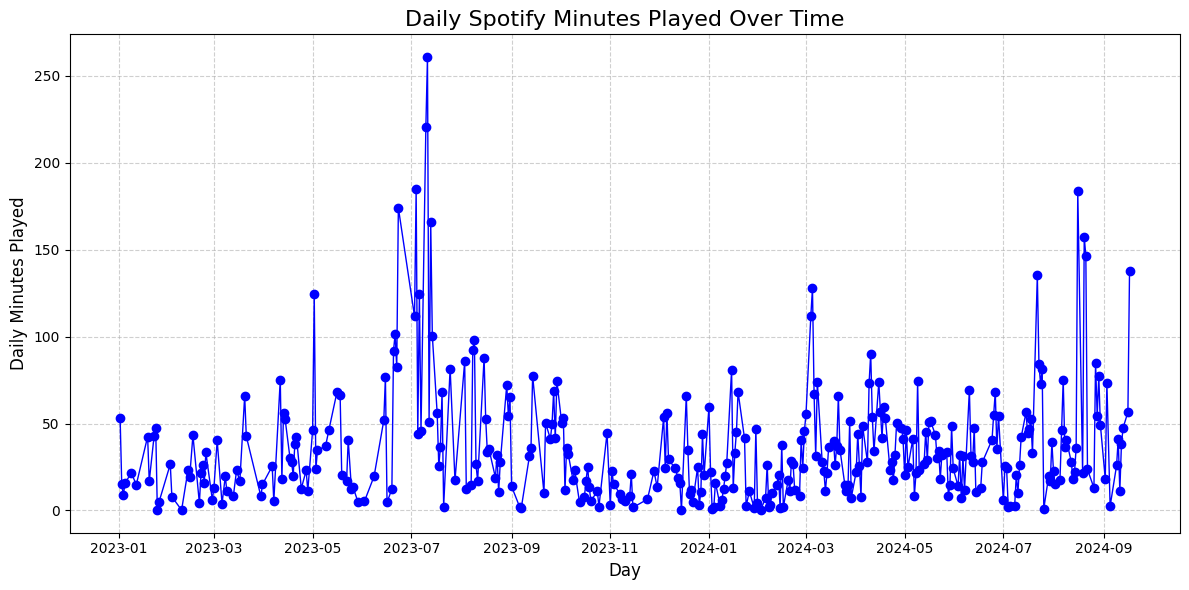

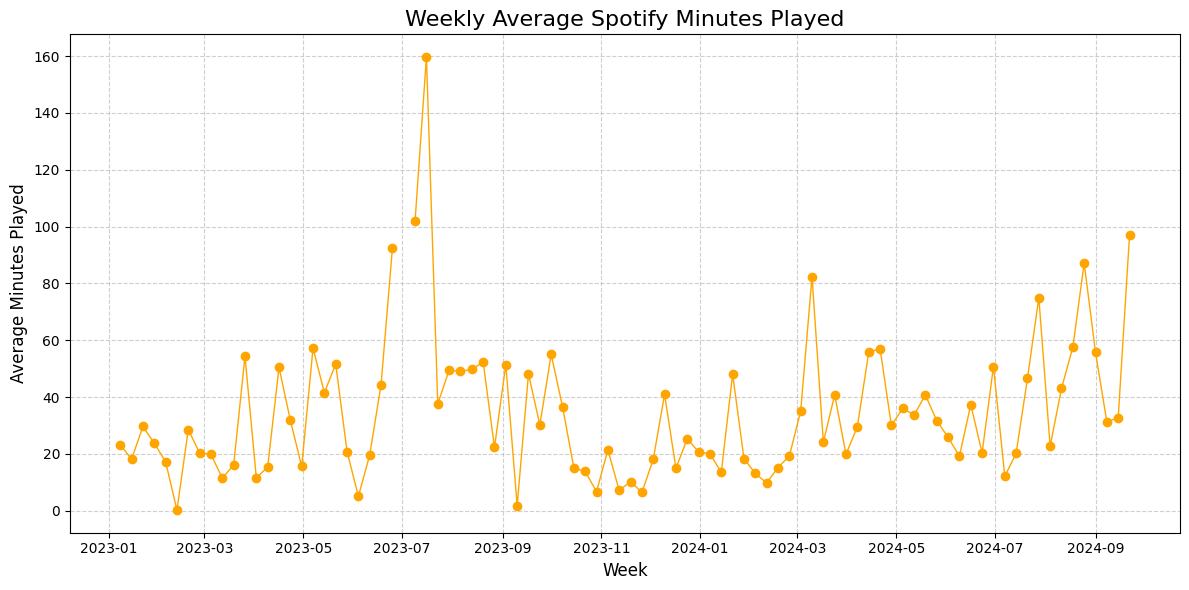

<ipython-input-24-8e82f330fce5>:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_minutes = spotify_time['Daily Minutes Played'].resample('M').sum()


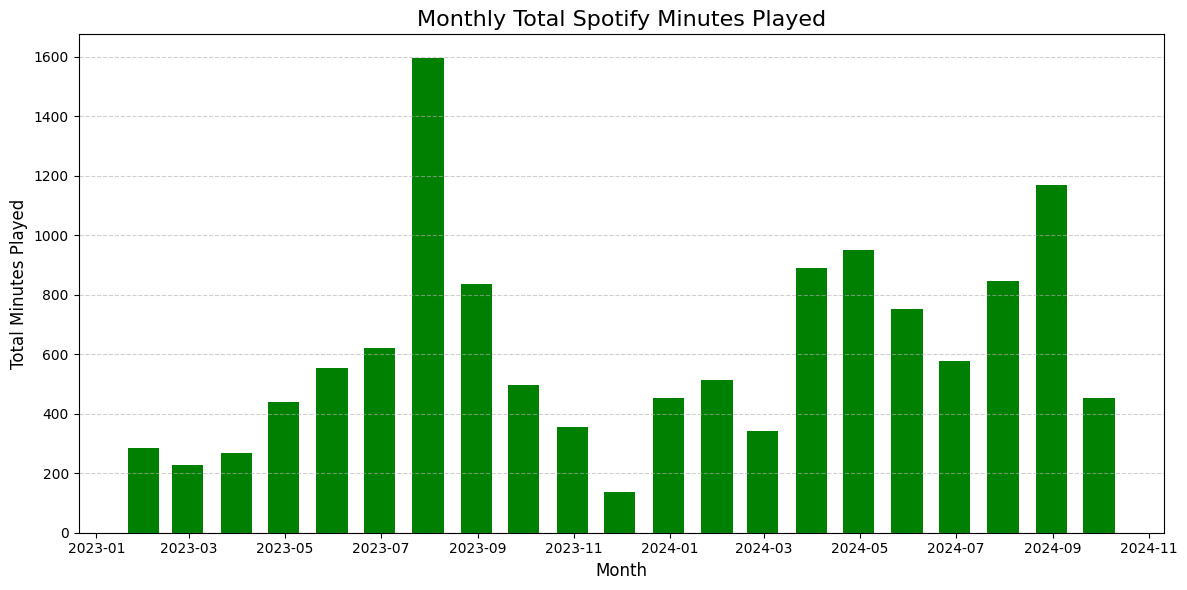

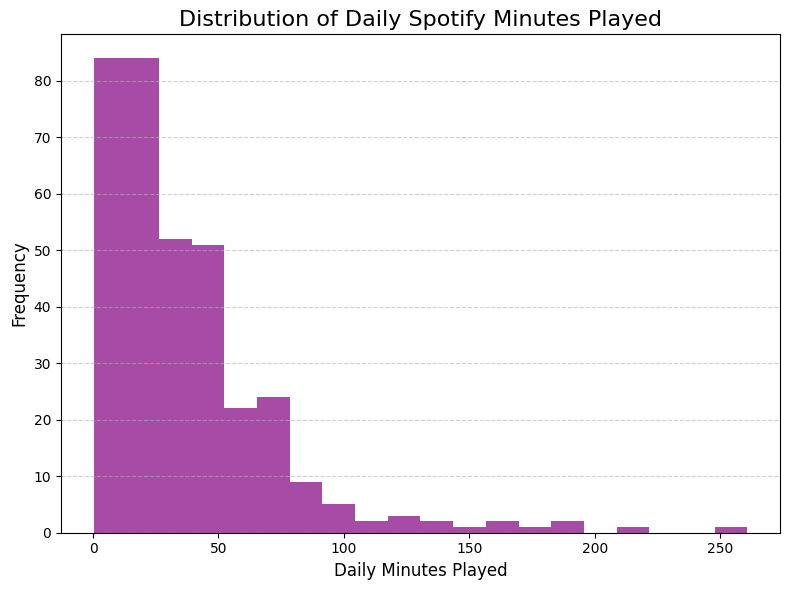

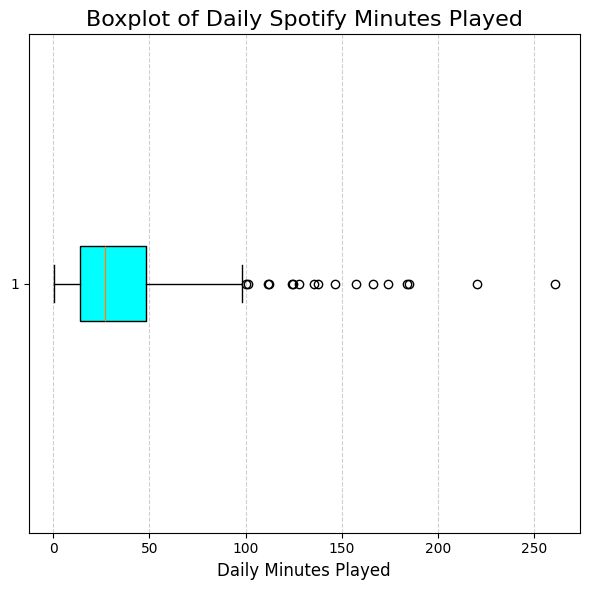

In [24]:
# Plot daily minutes played over time
plt.figure(figsize=(12, 6))
plt.plot(spotify_time['Day'], spotify_time['Daily Minutes Played'], marker='o', linestyle='-', linewidth=1, color='blue')
plt.title('Daily Spotify Minutes Played Over Time', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Daily Minutes Played', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Weekly average of minutes played
spotify_time['Day'] = pd.to_datetime(spotify_time['Day'])
spotify_time.set_index('Day', inplace=True)
weekly_minutes = spotify_time['Daily Minutes Played'].resample('W').mean()

plt.figure(figsize=(12, 6))
plt.plot(weekly_minutes.index, weekly_minutes, marker='o', linestyle='-', linewidth=1, color='orange')
plt.title('Weekly Average Spotify Minutes Played', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Average Minutes Played', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Monthly total minutes played
monthly_minutes = spotify_time['Daily Minutes Played'].resample('M').sum()

plt.figure(figsize=(12, 6))
plt.bar(monthly_minutes.index, monthly_minutes, color='green', width=20)
plt.title('Monthly Total Spotify Minutes Played', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Minutes Played', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Distribution of daily minutes played
plt.figure(figsize=(8, 6))
plt.hist(spotify_time['Daily Minutes Played'], bins=20, color='purple', alpha=0.7)
plt.title('Distribution of Daily Spotify Minutes Played', fontsize=16)
plt.xlabel('Daily Minutes Played', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Boxplot of daily minutes played
plt.figure(figsize=(6, 6))
plt.boxplot(spotify_time['Daily Minutes Played'], vert=False, patch_artist=True, boxprops=dict(facecolor='cyan', color='black'))
plt.title('Boxplot of Daily Spotify Minutes Played', fontsize=16)
plt.xlabel('Daily Minutes Played', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [25]:
spotify.rename(columns={
    'ts': 'Timestamp',
    'ms_played': 'Milliseconds Played',
    'master_metadata_album_artist_name': 'Artist Name',
    'master_metadata_track_name': 'Track Name',
    'spotify_track_uri': 'Track URI',
    'Day': 'Date',
    'minutes_played': 'Minutes Played'
}, inplace=True)

print(spotify)


                  Timestamp  Milliseconds Played         Artist Name  \
4410   2023-01-02T15:04:41Z               152053          Chet Faker   
4411   2023-01-02T15:06:03Z                73623  Stanley Turrentine   
4412   2023-01-02T15:06:06Z                 1787          Tanju Okan   
4413   2023-01-02T15:06:12Z                 6339       Belkıs Özener   
4414   2023-01-02T15:06:24Z                11447            Boramess   
...                     ...                  ...                 ...   
13013  2024-09-17T18:02:34Z                 1478             ALIZADE   
13014  2024-09-17T18:02:38Z                 4270             ALIZADE   
13015  2024-09-17T18:04:31Z               112590             ALIZADE   
13016  2024-09-17T20:15:49Z               159961             ALIZADE   
13017  2024-09-17T20:18:31Z               162711             ALIZADE   

                        Track Name                             Track URI  \
4410                    No Diggity  spotify:track:0PB8KUQHp

In [26]:
print(spotify_time)

            Daily Minutes Played
Day                             
2023-01-02             53.282967
2023-01-03             14.998250
2023-01-04              8.699750
2023-01-05             15.891917
2023-01-09             21.436417
...                          ...
2024-09-11             11.354383
2024-09-12             37.957633
2024-09-13             47.469383
2024-09-16             56.519283
2024-09-17            137.486933

[346 rows x 1 columns]


In [27]:
print(sleep)

            Day  Sleep Duration (hours)
0    2023-01-02                6.117778
1    2023-01-03                6.977222
2    2023-01-04                6.146111
3    2023-01-05                5.958056
4    2023-01-06                5.853611
..          ...                     ...
441  2024-09-11                7.083333
442  2024-09-12                7.083889
443  2024-09-13                6.367500
444  2024-09-16                7.083333
445  2024-09-17                6.756667

[446 rows x 2 columns]
